# How to train MNIST with FastAI

After reading chapter 4 of [Deep Learning for Coders with Fastai and PyTorch: AI Applications Without a PhD](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527), AKA "Fastbook", I can train very easily with FastAI.

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 46 kB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 9.1 MB/s 
     |████████████████████████████████| 186 kB 21.1 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 51 kB 307 kB/s 


Although it is discouraged to `import *` in python progarmming environment, in deep learning enviornment, it is actually encouraged. Rather than importing libraries as needed one by one, it is easier to load everything needed before start exploring. It is better to have it and not need it than need it and not have it.

In [ ]:
from fastai.vision.all import *

We are going to use MNIST handwritten data. With FastAI, it is very easy to download data into our path.

In [ ]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

Now that we have data, we need a datablock, which is a template for how data should be processed. 

---

Here is how our template is made:
- `blocks=(ImageBlock, CategoryBlock)` means inputs are images and labels are multiple categories. 
- `get_items=get_image_files` specifies it is taking image files.
- `splitter=RandomSplitter(seed=42)` randomly sets aside 20 percent of whole dataset for validation so that we can check for overfitting. Although MNIST dataset already has validation set, we do not have to use as suggested. 
- `get_y=parent_label` specifies how our data gets labels from the data. In this dataset, each image's parent directory informs us what kind of digit it is.

In [ ]:
digits = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(seed=42),
                   get_y=parent_label)
dls = digits.dataloaders(path)

Now that we have the dataloaders, we can take a look at the data with `dls.showbatch()`. 

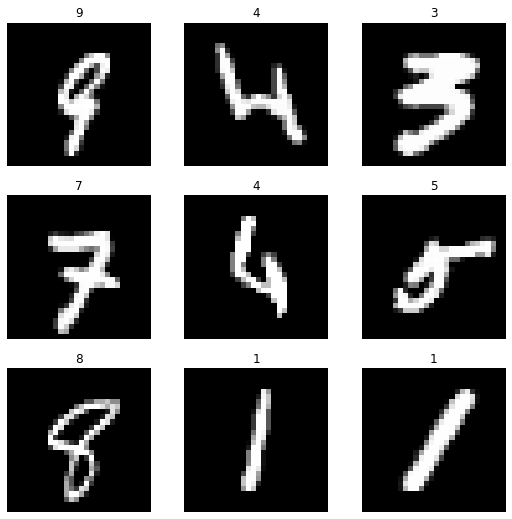

In [ ]:
dls.show_batch()

It looks good. Each image has a correct label. It is time to train our model with the data. Instead of making our models from scratch, we will use pretrained model because we can save time and resources. With `cnn_learner`, we use resnet18 and set our metrics as error_rate. Then we `fine_tune` our model, which means we remove the last layer of resnet18 and replace it with our custom one, which will categorize what kind of digit it is. Also, this last layer, which is also called 'head', is the only layer we are training. All other layers remain the same. 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.724134,0.505309,0.158071,07:06


epoch,train_loss,valid_loss,error_rate,time
0,0.113460,0.064733,0.017857,14:49
1,0.045581,0.044138,0.013214,15:11


FastAI will use GPU automatically if it is available. On a google colab GPU server, it took about six minutes to train with error rate close to 1%. 

It is very easy to get started with FastAI because everything is already tuned for best practices without us trying to come up with everything in the beginning. When first training a model, this can be a quick baseline for us to compare with. With this baseline, we can figure out how more complex model is performing. 